In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

In [2]:
from scipy import stats

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
dataset = randn(25)

(0, 1)

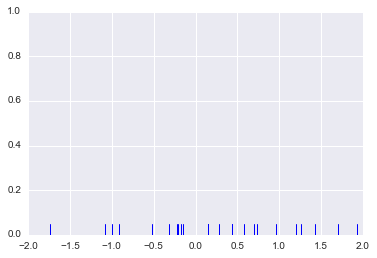

In [9]:
sns.rugplot(dataset)
plt.ylim(0,1)

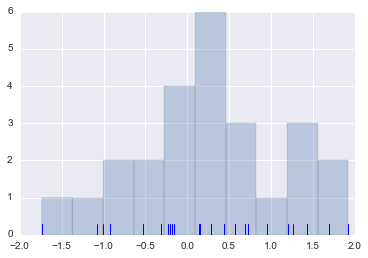

In [13]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

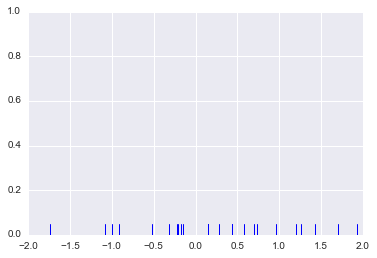

In [15]:
x_min = dataset.min()-2
x_max = dataset.max()+2
x_axis = np.linspace(x_min,x_max,100)

In [16]:
bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

In [17]:
kernel_list = []

(0, 1)

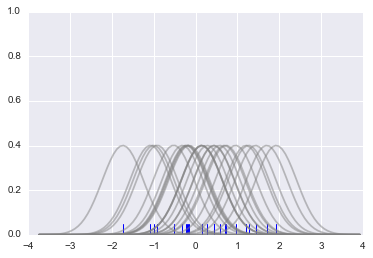

In [21]:
sns.rugplot(dataset)
for data_point in dataset:
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    kernel = kernel/kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)
    
plt.ylim(0,1)


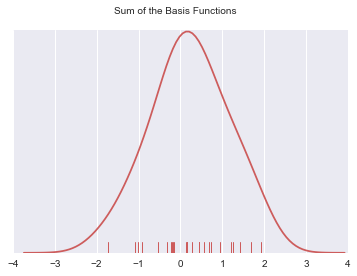

In [24]:
sum_of_kde = np.sum(kernel_list,axis=0)
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

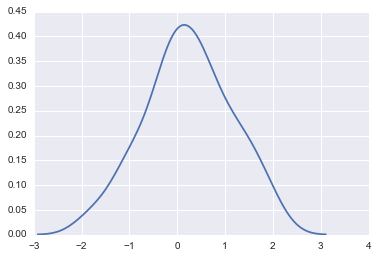

In [25]:
sns.kdeplot(dataset)

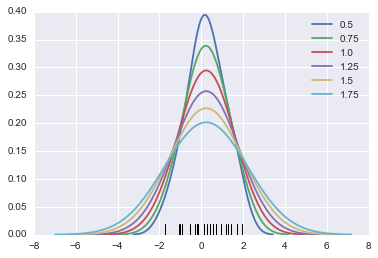

In [27]:
sns.rugplot(dataset,color='black')
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)


In [28]:
kernel_options = ["biw", "cos", "epa", "gau", "tri", "triw"]

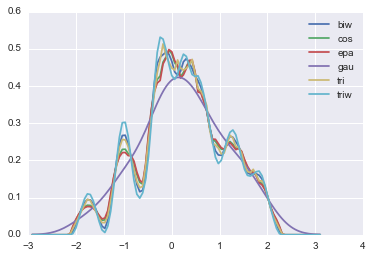

In [29]:
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)

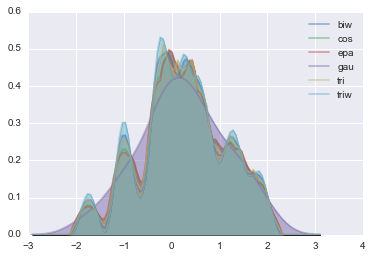

In [30]:
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True,alpha=0.5)

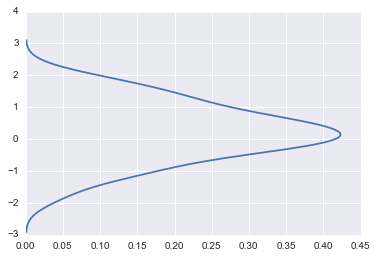

In [31]:
sns.kdeplot(dataset,vertical=True)

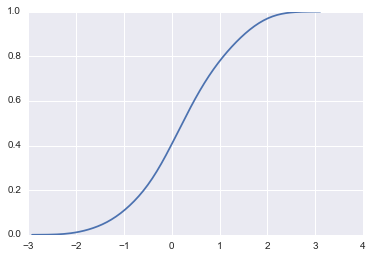

In [32]:
sns.kdeplot(dataset,cumulative=True)

In [33]:
mean = [0,0]

In [35]:
cov = [[1,0],[0,100]]
dataset2 = np.random.multivariate_normal(mean,cov,1000)
dframe = pd.DataFrame(dataset2,columns=['X','Y'])

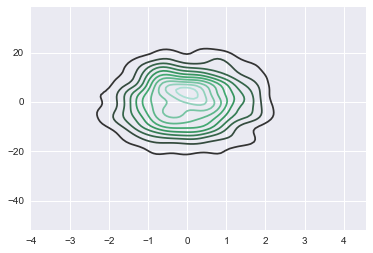

In [36]:
sns.kdeplot(dframe)

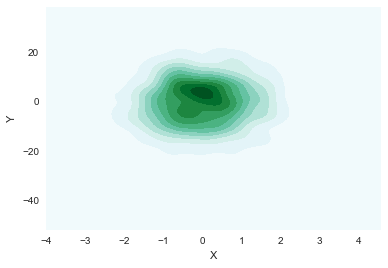

In [37]:
sns.kdeplot(dframe.X,dframe.Y,shade=True)

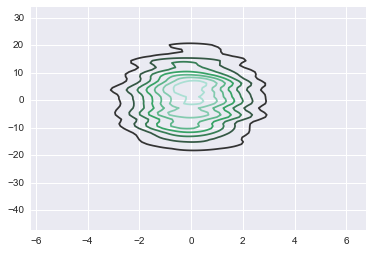

In [38]:
sns.kdeplot(dframe,bw=1)

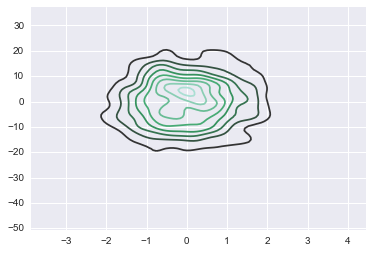

In [40]:
sns.kdeplot(dframe,bw='silverman')

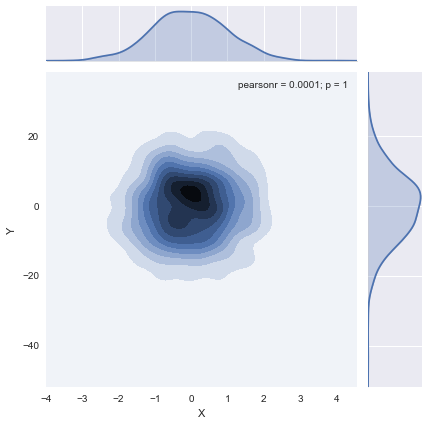

In [43]:
sns.jointplot('X','Y',dframe,kind='kde')